In [12]:
import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


In [13]:
# Display the first few rows of the dataset
print(titanic.head())

# Display summary information
print(titanic.info())

# Check for missing values
print(titanic.isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [14]:
# Fill missing values for 'age' with the median value
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing values for 'embarked' with the most common value
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop the 'deck' column due to many missing values
titanic.drop(columns=['deck'], inplace=True)

# Drop any remaining rows with missing values
titanic.dropna(inplace=True)


In [15]:
# Convert 'sex' and 'embarked' to numerical using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

# Convert 'class' and 'who' using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['class', 'who'], drop_first=True)

# Drop unnecessary columns
titanic.drop(columns=['alive', 'embark_town', 'adult_male'], inplace=True)


In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.76


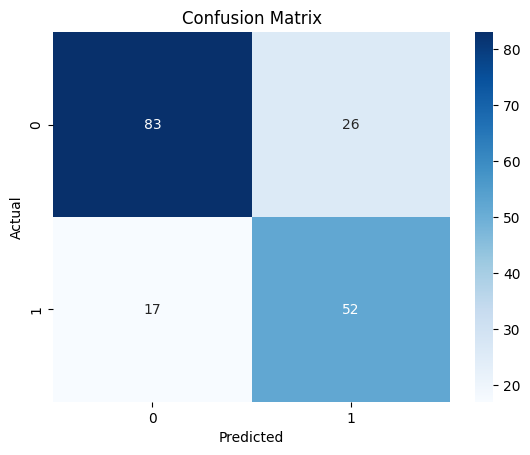

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


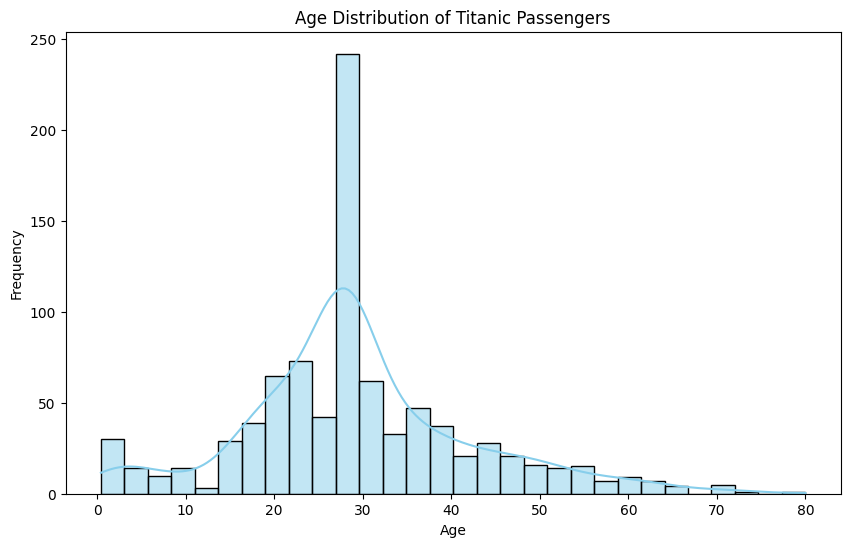

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


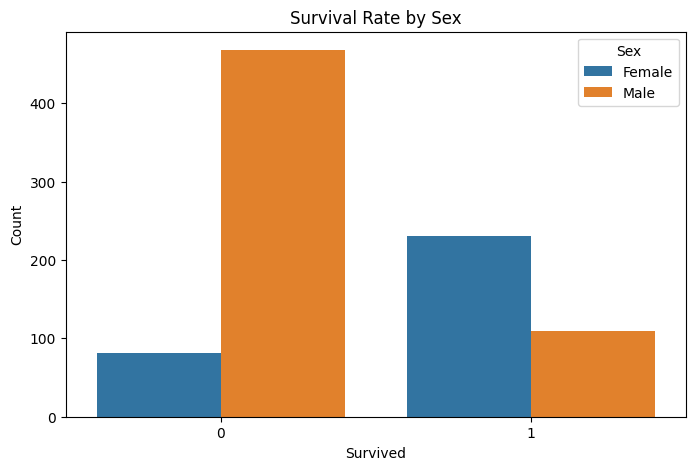

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', hue='sex_male', data=titanic)
plt.title('Survival Rate by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()


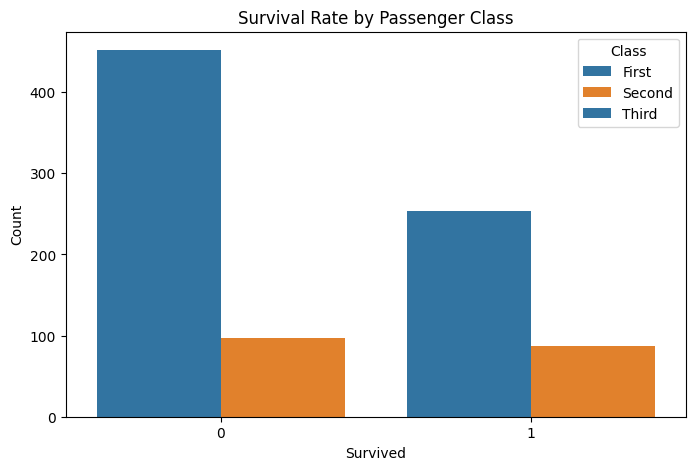

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', hue='class_Second', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Class', labels=['First', 'Second', 'Third'])
plt.show()


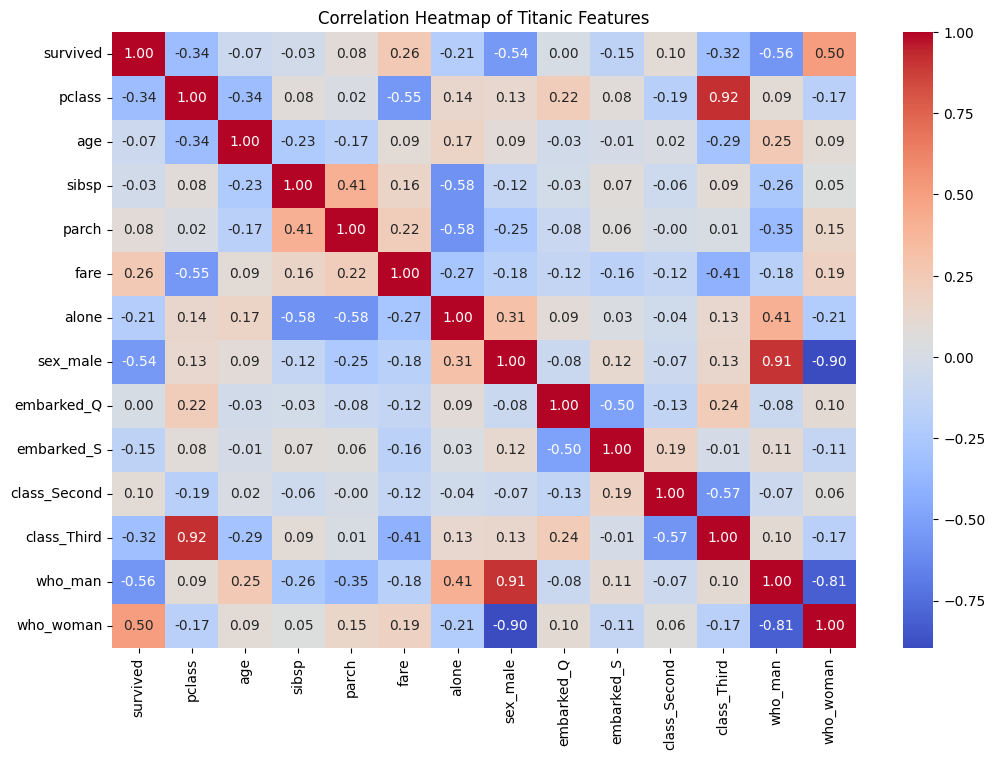

In [23]:
plt.figure(figsize=(12, 8))
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Features')
plt.show()


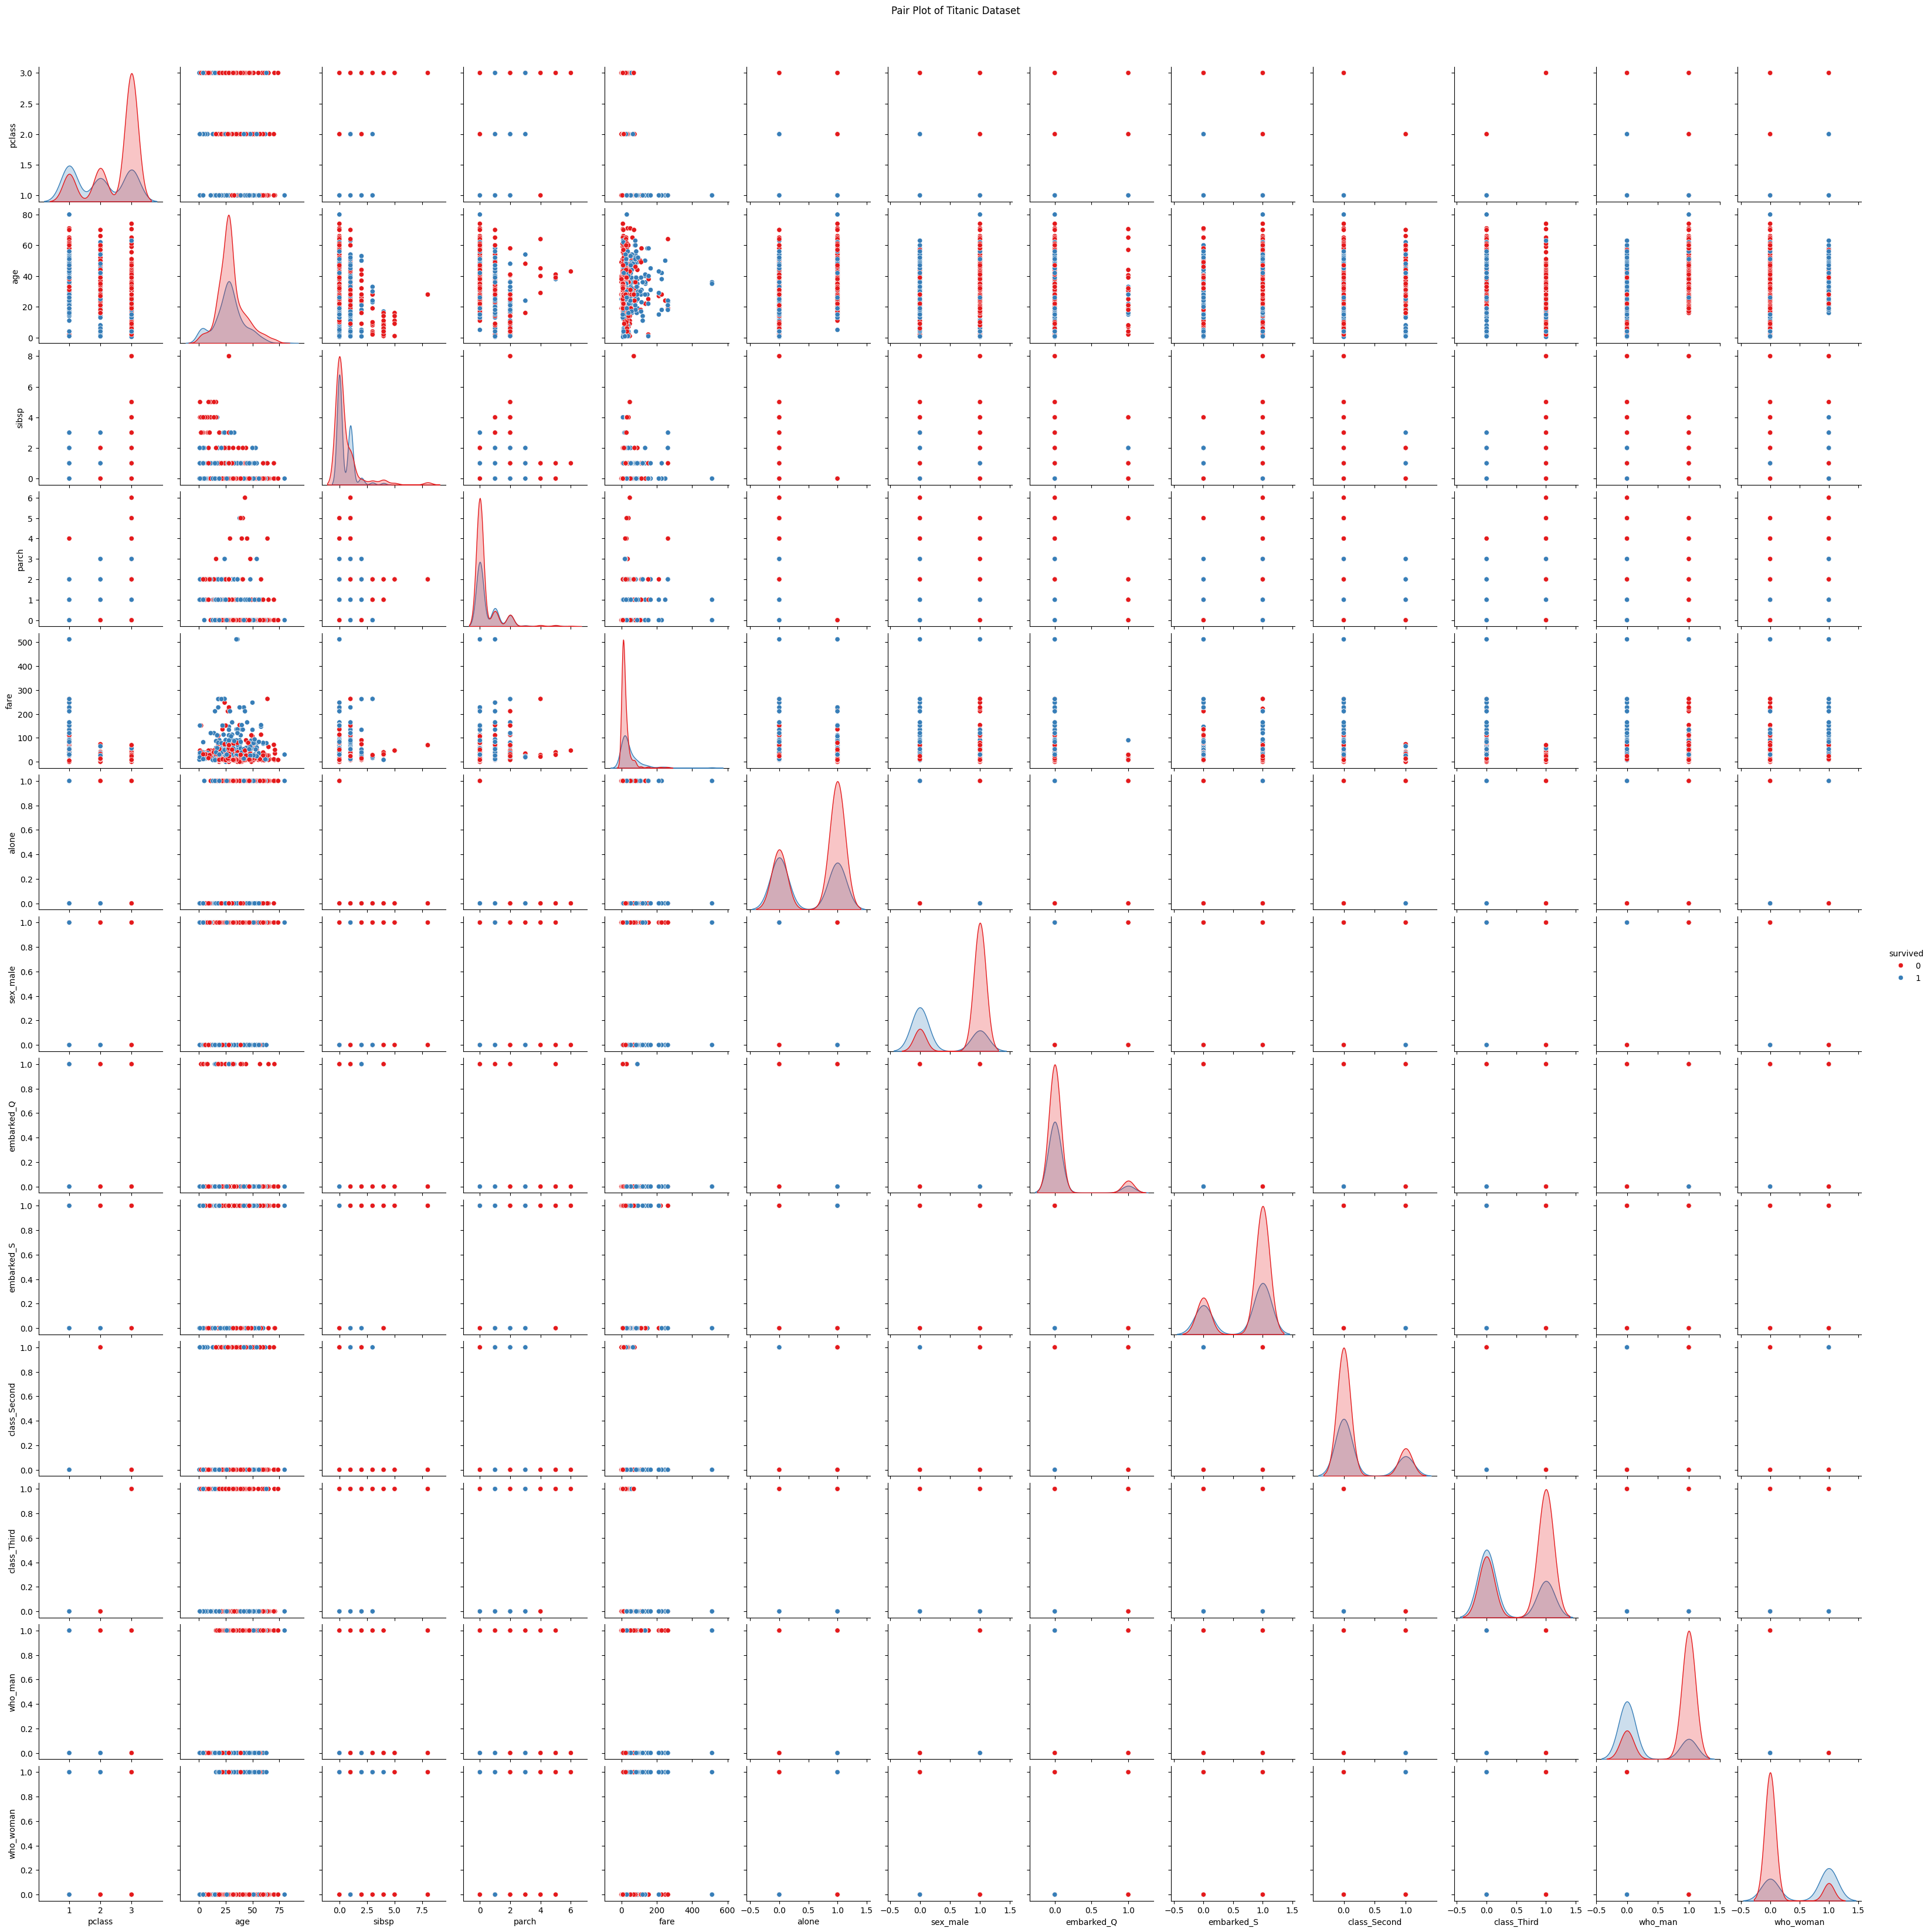

In [24]:
sns.pairplot(titanic, hue='survived', palette='Set1')
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)
plt.show()


<ipython-input-25-f5a303a6dca0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


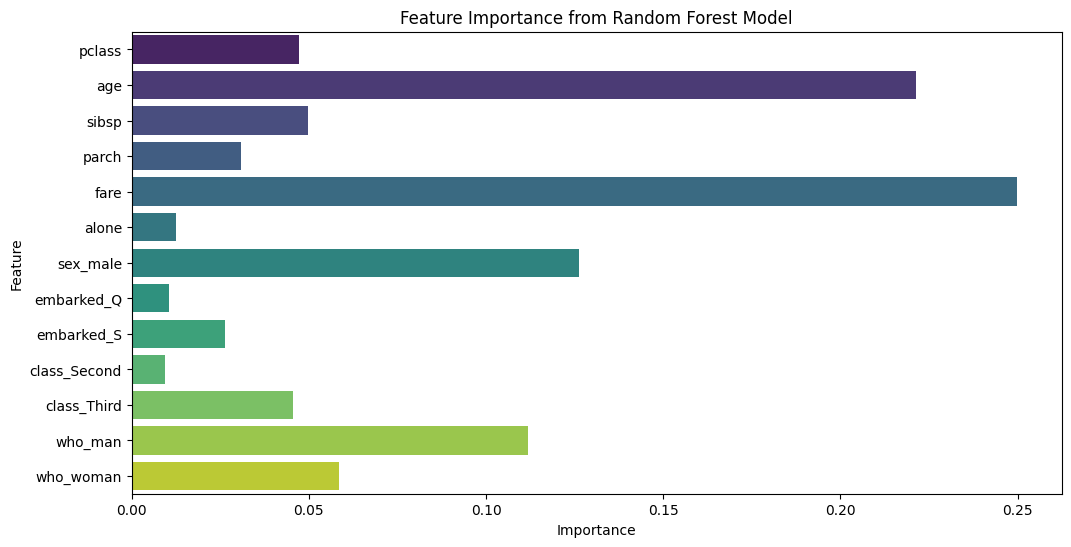

In [25]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


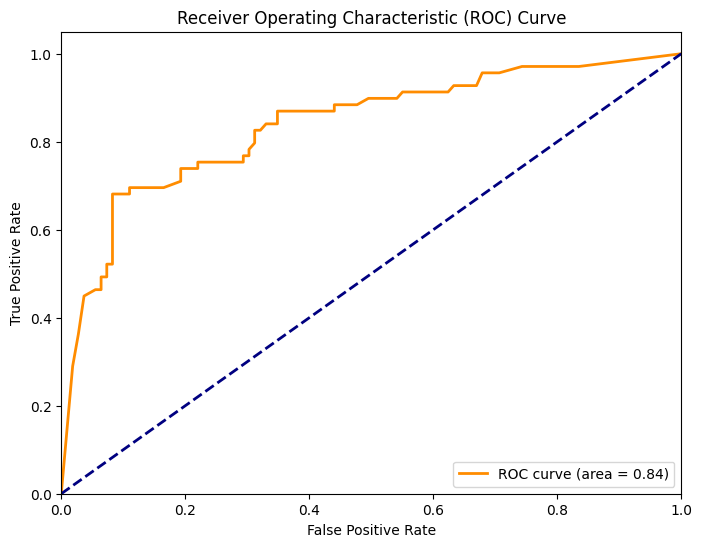

In [26]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
